# Example of reading a data file from a Sensing Secchi Disk 

## Overview

This Jupyter notebook accompanies the manuscript of Brewin et al. titled “Lab on a Secchi disk: A prototype opensource profiling package for low-cost monitoring in aquatic environments”. It is designed to illustrate how to read a data file from a Sensing Secchi Disk.

Please note that this example is designed such that each cell (block of Python code) is run after the previous cell. If you clear or restart, you will need to run through each cell from the start. 

## Data

This example data file was collected at Trelissick Ponoon, Cornwall, UK, on the 3rd February 2023.

## Load programmes

In [1]:
#Programes and functions
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import datetime
import linecache2 as linecache
import regex as re
from matplotlib import pyplot as plt 

## Read data from file, compute depth and print discrete data

In [2]:
#Datafile
File_1 = "23020309.txt"

#Centre wavelengths for light sensor
Wavelength = [415,445,480,515,555,590,630,680]

#Extract from file: Secchi Depth (SD), Forel–Ule (FU), 
#pH, serial number of device (SN), latitude, longitude and date
SD        = linecache.getline(File_1, 1)
SD        = np.float_(re.findall(r'\d+', SD))
FU        = linecache.getline(File_1, 2)
FU        = np.float_(re.findall(r'\d+', FU))
pH        = linecache.getline(File_1, 3)
pH        = np.float_(re.findall(r'\d+', pH))
SN        = linecache.getline(File_1, 4)
SN        = np.float_(re.findall(r'\d+', SN))
Latitude  = linecache.getline(File_1, 5)
Latitude  = np.float_(re.findall(r'-?\d+\.?\d+m?', Latitude))
Longitude = linecache.getline(File_1, 6)
Longitude = np.float_(re.findall(r'-?\d+\.?\d+m?', Longitude))                      
Date      = linecache.getline(File_1, 7)
Date      = re.findall(r'\d+', Date)
Year      = np.float_([Date[0]])
Month     = np.float_([Date[1]])
Day       = np.float_([Date[2]])

#Extract profile data
df = pd.read_csv(File_1, header = 7)
Time_SS           = df.loc[:,'Time (UTC)'].to_numpy()
Pressure_SS       = df.loc[:,' Pressure (mbar) MS5803'].to_numpy()
Temp_MS5803_SS    = df.loc[:,' Temp (deg C) MS5803'].to_numpy()
E415nm_SS         = df.loc[:,' 415nm'].to_numpy()
E445nm_SS         = df.loc[:,' 445nm'].to_numpy()
E480nm_SS         = df.loc[:,' 480nm'].to_numpy()
E515nm_SS         = df.loc[:,' 515nm'].to_numpy()
E555nm_SS         = df.loc[:,' 555nm'].to_numpy()
E590nm_SS         = df.loc[:,' 590nm'].to_numpy()
E630nm_SS         = df.loc[:,' 630nm'].to_numpy()
E680nm_SS         = df.loc[:,' 680nm'].to_numpy()
EPAR_SS           = df.loc[:,' Clear'].to_numpy()
ENIR_SS           = df.loc[:,' NIR'].to_numpy()
Temp_TH_SS        = df.loc[:,' Temp (deg C) TMP117'].to_numpy()

#Compute atmospheric pressue assuming first 5 readings are in atmosphere
ATMOS_P           = np.median(Pressure_SS[0:5])

#Correct differences in sensor distance
#Compute depth (assuming pressure = depth)
Depth_SS          = ((Pressure_SS - ATMOS_P)/100.)
#Correct for distnace between temperature sensor and pressue
Depth_SS_T        = Depth_SS + 0.007
#Correct for distnace between light sensor and pressue
Depth_SS_L        = Depth_SS - 0.02
      
#Sort time to decimal hour and compute seconds (DATA_SEC) and second since start (DATA_SEC0)
HH = np.empty([len(Time_SS)])
MM = np.empty([len(Time_SS)])
SS = np.empty([len(Time_SS)])
for j in range(len(Time_SS)): 
    time = datetime.datetime.strptime(Time_SS[j], '%H:%M:%S')
    HH[j] = time.hour
    MM[j] = time.minute
    SS[j] = time.second
DATA_SEC = (HH*3600.) + (MM*60.) + (SS)
DATA_SEC0         = DATA_SEC - DATA_SEC[0]

#Print extracted data
print('Year = ', Year[0])
print('Month = ', Month[0])
print('Day = ', Day[0])
print('Latitude (degs N) = ', Latitude[0])
print('Longitude (degs E) = ', Longitude[0])
print('Secchi depth (cm) = ', SD[0])
print('Forel Ule = ', FU[0])
print('pH = ', pH[0])

Year =  2023.0
Month =  2.0
Day =  3.0
Latitude (degs N) =  50.21591
Longitude (degs E) =  -5.02783
Secchi depth (cm) =  345.0
Forel Ule =  8.0
pH =  99.0


## Plot raw profile data

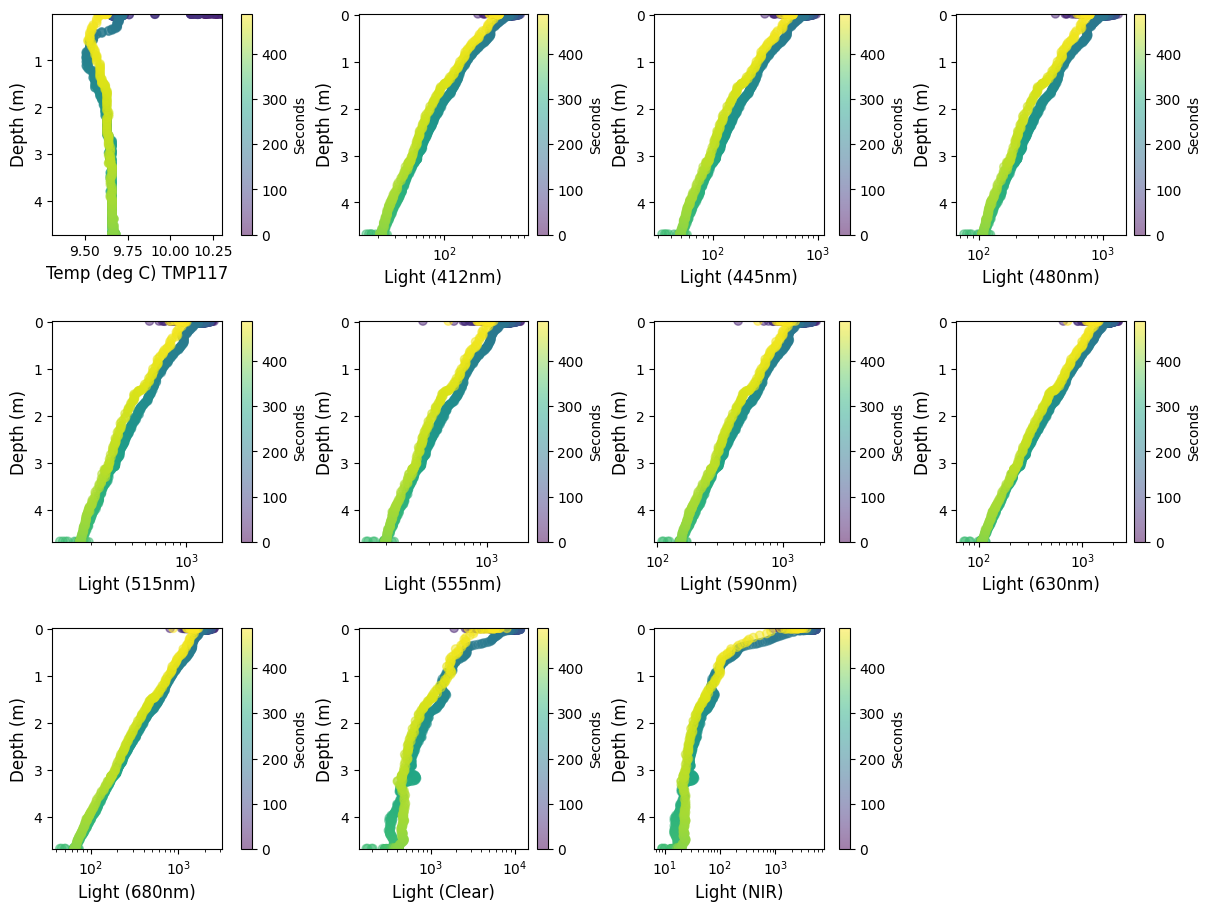

In [3]:
#Set up the plot
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]) = plt.subplots(3,4,  figsize=(12,9), \
    constrained_layout=True, gridspec_kw={'hspace': 0.1})

#Plot temperature (TMP117) profile
im1 = ax1.scatter(Temp_TH_SS,Depth_SS_T, c = DATA_SEC0, marker='o', alpha = 0.5)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.set_xlabel('Temp (deg C) TMP117', fontsize=12)
ax1.set_ylim([np.max(Depth_SS_T),np.min(Depth_SS_T)])
ax1.set_xlim([np.min(Temp_TH_SS)-0.2,np.percentile(Temp_TH_SS, 90)])
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.set_label("Seconds")

#Plot light at 415nm
im2 = ax2.scatter(E415nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.set_xlabel('Light (412nm)', fontsize=12)
ax2.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax2.set_xscale('log')
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_label("Seconds")

#Plot light at 445nm
im3 = ax3.scatter(E445nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax3.set_ylabel('Depth (m)', fontsize=12)
ax3.set_xlabel('Light (445nm)', fontsize=12)
ax3.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax3.set_xscale('log')
cbar3 = fig.colorbar(im3, ax=ax3)
cbar3.set_label("Seconds")

#Plot light at 480nm
im4 = ax4.scatter(E480nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax4.set_ylabel('Depth (m)', fontsize=12)
ax4.set_xlabel('Light (480nm)', fontsize=12)
ax4.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax4.set_xscale('log')
cbar4 = fig.colorbar(im4, ax=ax4)
cbar4.set_label("Seconds")

#Plot light at 515nm
im5 = ax5.scatter(E515nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax5.set_ylabel('Depth (m)', fontsize=12)
ax5.set_xlabel('Light (515nm)', fontsize=12)
ax5.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax5.set_xscale('log')
cbar5 = fig.colorbar(im5, ax=ax5)
cbar5.set_label("Seconds")

#Plot light at 555nm
im6 = ax6.scatter(E555nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax6.set_ylabel('Depth (m)', fontsize=12)
ax6.set_xlabel('Light (555nm)', fontsize=12)
ax6.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax6.set_xscale('log')
cbar6 = fig.colorbar(im6, ax=ax6)
cbar6.set_label("Seconds")

#Plot light at 590nm
im7 = ax7.scatter(E590nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax7.set_ylabel('Depth (m)', fontsize=12)
ax7.set_xlabel('Light (590nm)', fontsize=12)
ax7.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax7.set_xscale('log')
cbar7 = fig.colorbar(im7, ax=ax7)
cbar7.set_label("Seconds")

#Plot light at 630nm
im8 = ax8.scatter(E630nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax8.set_ylabel('Depth (m)', fontsize=12)
ax8.set_xlabel('Light (630nm)', fontsize=12)
ax8.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax8.set_xscale('log')
cbar8 = fig.colorbar(im8, ax=ax8)
cbar8.set_label("Seconds")

#Plot light at 680nm
im9 = ax9.scatter(E680nm_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax9.set_ylabel('Depth (m)', fontsize=12)
ax9.set_xlabel('Light (680nm)', fontsize=12)
ax9.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax9.set_xscale('log')
cbar9 = fig.colorbar(im9, ax=ax9)
cbar9.set_label("Seconds")

#Plot light at Clear channel
im10 = ax10.scatter(EPAR_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax10.set_ylabel('Depth (m)', fontsize=12)
ax10.set_xlabel('Light (Clear)', fontsize=12)
ax10.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax10.set_xscale('log')
cbar10 = fig.colorbar(im10, ax=ax10)
cbar10.set_label("Seconds")

#Plot light at Clear channel
im11 = ax11.scatter(ENIR_SS,Depth_SS_L, c = DATA_SEC0, marker='o', alpha = 0.5)
ax11.set_ylabel('Depth (m)', fontsize=12)
ax11.set_xlabel('Light (NIR)', fontsize=12)
ax11.set_ylim([np.max(Depth_SS_L),np.min(Depth_SS_L)])
ax11.set_xscale('log')
cbar11 = fig.colorbar(im11, ax=ax11)
cbar11.set_label("Seconds")

ax12.set_visible(False)

plt.show()